<a href="https://colab.research.google.com/github/ElenirOliveira/Telecomx-2/blob/main/Telecomx_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📈 Previsão de Churn - Projeto Telecom X

## 🎯 Objetivo
Prever a saída (churn) de clientes com base em variáveis relevantes, utilizando modelos de machine learning.

## 📁 Estrutura do Projeto
- `Telecomx_2.ipynb`: notebook principal com a análise e modelagem.
- `TelecomX_Dados_tratados.csv`: dataset tratado.
- Visualizações geradas diretamente no notebook.

## ⚙️ Execução
Antes de executar o notebook, instale as bibliotecas:
```bash
pip install pandas scikit-learn seaborn matplotlib



# 🧪 Etapas
* Leitura dos dados tratados.

* Codificação de variáveis categóricas.

* Separação em treino e teste.

* Normalização dos dados (apenas para regressão).

* Treinamento de dois modelos.

* Avaliação com métricas e gráficos.


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df_tratado = pd.read_csv('/content/TelecomX_Dados_tratados (1).csv')
display(df_tratado.head())

,id_cliente,Churn,Genero,Idoso,Parceiro,Dependentes,Tempo de serviço,Telefone,Multiplas linhas,Servico de internet,...,Protecao de dispositivo,Suporte tecnico,Streaming TV,Streaming Filmes,Contrato,Faturamento,Metodo de pagamento,valor_mensal,valor_total,Contas_Diarias
0,0002ORFBO,0,Feminino,Não,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003MKNFE,0,Masculino,Não,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Monthtomonth,No,Mailed check,59.9,542.40,1.996667
2,0004TLHLJ,1,Masculino,Não,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Monthtomonth,Yes,Electronic check,73.9,280.85,2.463333
3,0011IGKFF,1,Masculino,Sim,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Monthtomonth,Yes,Electronic check,98.0,1237.85,3.266667
4,0013EXCHZ,1,Feminino,Sim,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Monthtomonth,Yes,Mailed check,83.9,267.40,2.796667


In [18]:
# Encoding de variáveis categóricas
label_cols = df_tratado.select_dtypes(include='object').columns
for col in label_cols:
    df_tratado[col] = LabelEncoder().fit_transform(df_tratado[col].astype(str))


In [19]:
# Separação entre variáveis e alvo
X = df_tratado.drop('Churn', axis=1)
y = df_tratado['Churn']

In [20]:
print(df_tratado.columns)

Index(['id_cliente', 'Churn', 'Genero', 'Idoso', 'Parceiro', 'Dependentes',
       'Tempo de serviço', 'Telefone', 'Multiplas linhas',
       'Servico de internet', 'Seguranca online', 'Backup',
       'Protecao de dispositivo', 'Suporte tecnico', 'Streaming TV',
       'Streaming Filmes', 'Contrato', 'Faturamento', 'Metodo de pagamento',
       'valor_mensal', 'valor_total', 'Contas_Diarias'],
      dtype='object')


In [21]:
# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [22]:
# Normalização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [24]:
# Modelos
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

In [25]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [26]:
# 📊 Avaliação
print("Regressão Logística:\n", classification_report(y_test, y_pred_lr))
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

Regressão Logística:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1552
           1       0.62      0.54      0.57       561

    accuracy                           0.79      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.78      0.79      0.78      2113

Random Forest:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.62      0.49      0.55       561

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.70      2113
weighted avg       0.77      0.79      0.78      2113



Text(0.5, 1.0, 'Matriz - Regressão Logística')

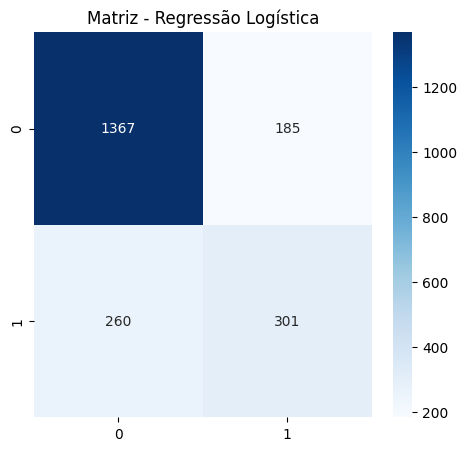

In [27]:
# Matriz de Confusão
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz - Regressão Logística')

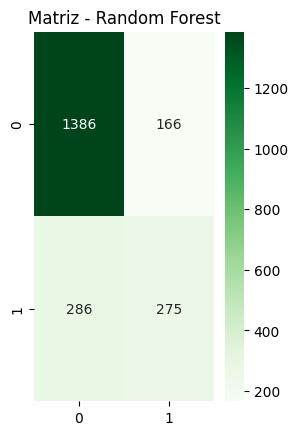

In [28]:
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Matriz - Random Forest')
plt.show()

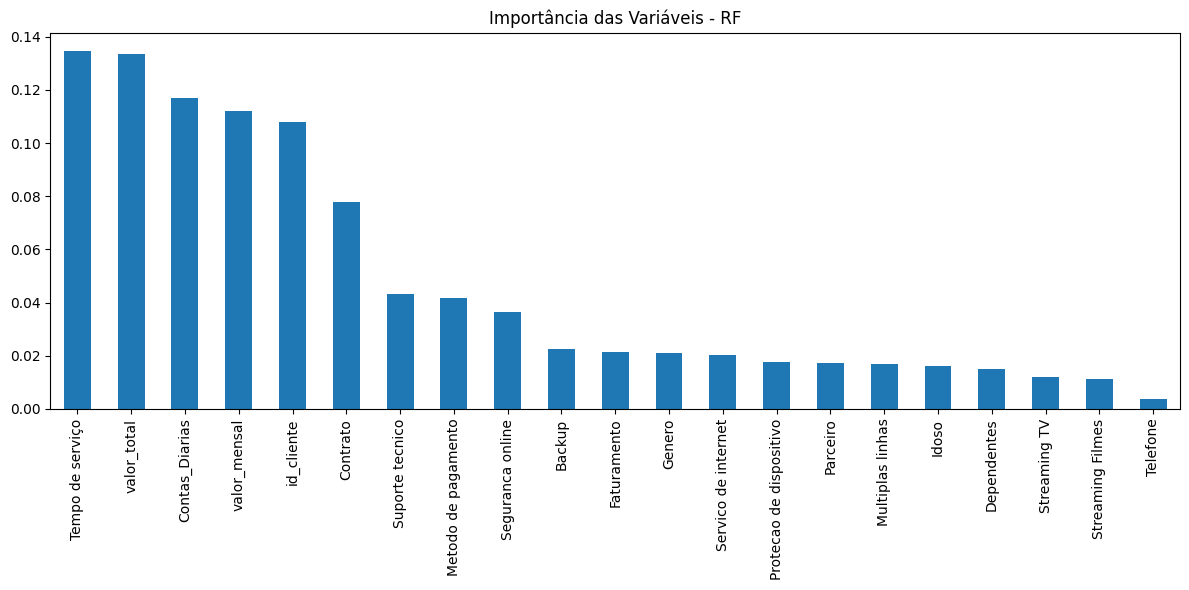

In [29]:
# 🔍 Importância das variáveis (Random Forest)
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12,6), title='Importância das Variáveis - RF')
plt.tight_layout()
plt.show()